In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv(r'res_data_log.csv')

In [3]:
#Exponential smoothing
def exponential_smoothing(series, alpha):
  result = [series[0]]
  for n in range(1, len(series)):
    # Y`t+1 = a*Yt + (1-t)*Y`t
    result.append(alpha * series[n] + (1 - alpha) * result[n - 1])
  return result

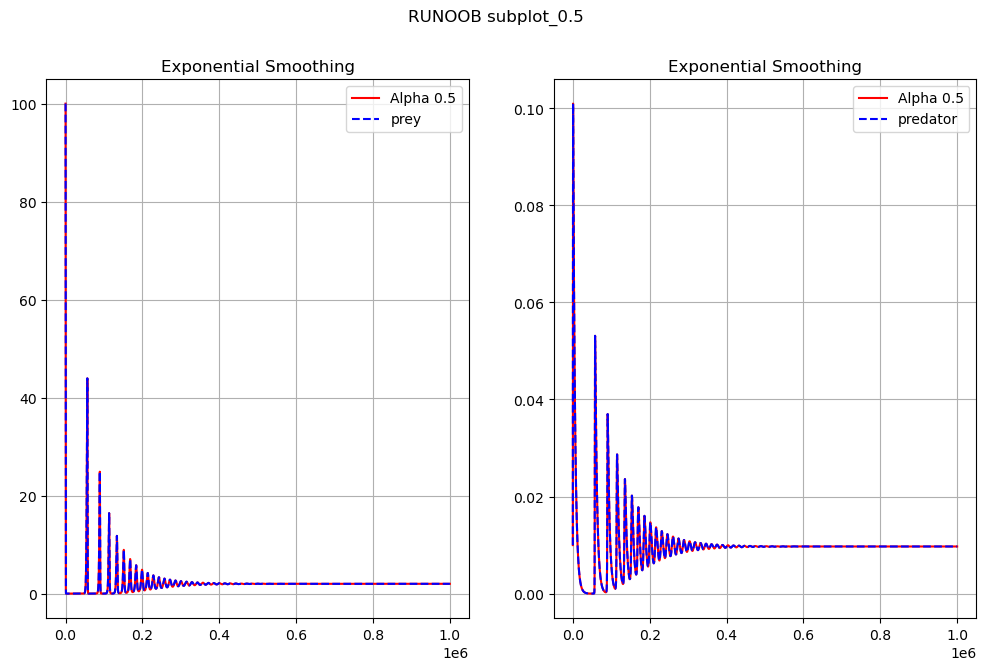

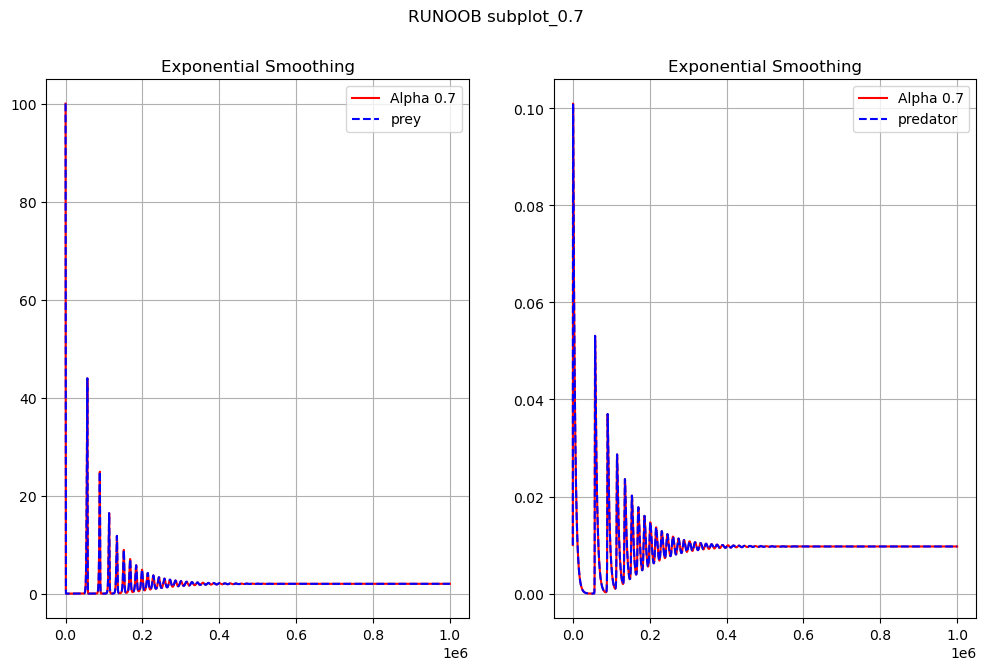

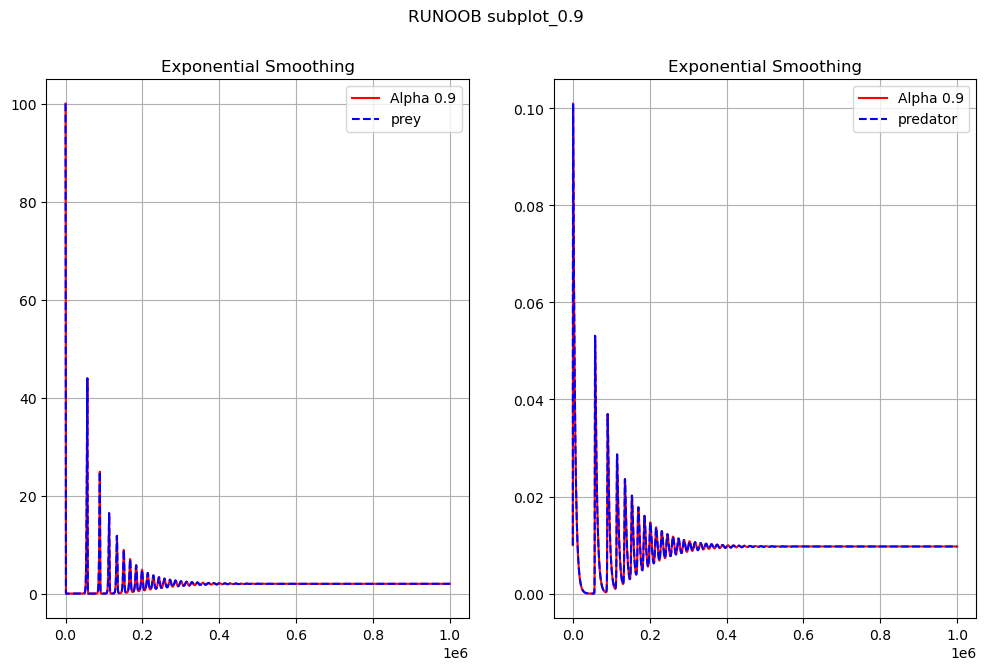

In [4]:
alphas = [0.5,0.7,0.9]

for alpha in alphas:
    plt.figure(figsize=(12,7))

    plt.subplot(121)
    plt.plot(exponential_smoothing(df['prey'], alpha),'r',label="Alpha {}".format(alpha),linestyle='-')
    plt.plot(df['prey'].values,"b",label = "prey",linestyle='--')
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True)

    plt.subplot(122)
    plt.plot(exponential_smoothing(df['predator'], alpha),'r',label="Alpha {}".format(alpha),linestyle='-')
    plt.plot(df['predator'].values,color = "b",label = "predator",linestyle='--')
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True)

    plt.suptitle("RUNOOB subplot_{}".format(alpha))
    plt.show()

In [5]:
#moving average method
def MovingAverage(df,n): 
    rolling = df['prey'].rolling(window=n)
    rolling_mean = rolling.mean()
    plt.figure(figsize=(12,12))
    plt.subplot(221)
    plt1, = plt.plot(rolling_mean,'r',label = "prey_Average",linestyle='-')
    plt2, = plt.plot(df['prey'].values,"b",label = "prey_True",linestyle='--')
    plt.legend(handles=[plt1, plt2], loc='upper right')
    
    plt.subplot(222)
    rolling = df['predator'].rolling(window=n)
    rolling_mean = rolling.mean()
    plt1, = plt.plot(rolling_mean,'r',label = "predator_Average",linestyle='-')
    plt2, = plt.plot(df['predator'].values,"b",label = "predator_True",linestyle='--')
    plt.legend(handles=[plt1, plt2], loc='upper right')
    plt.show()

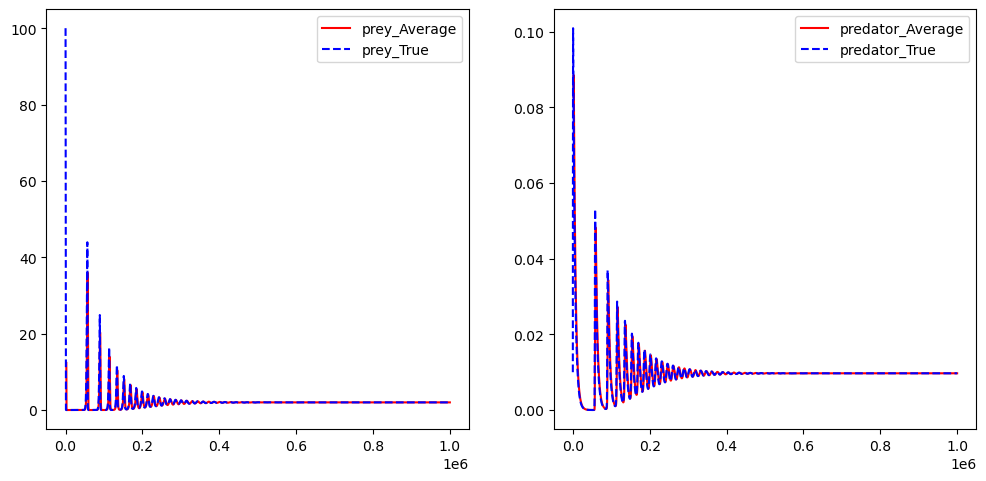

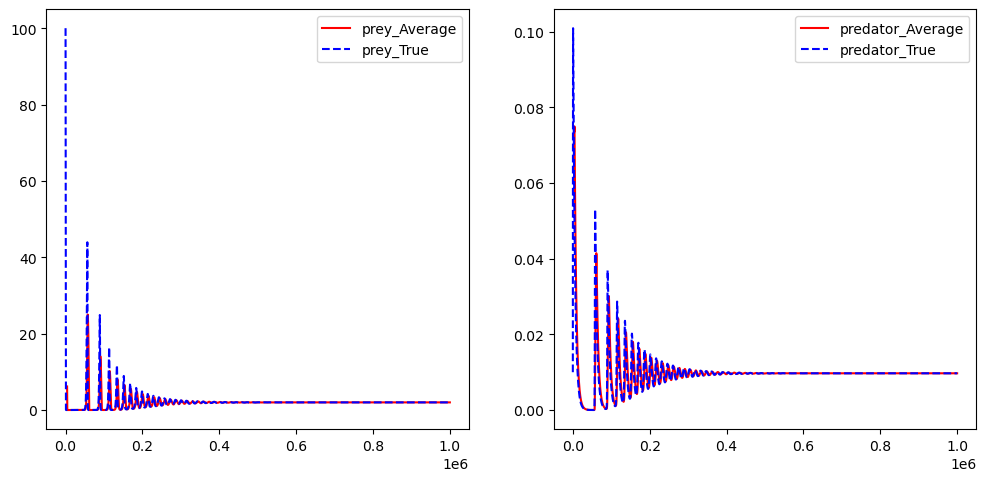

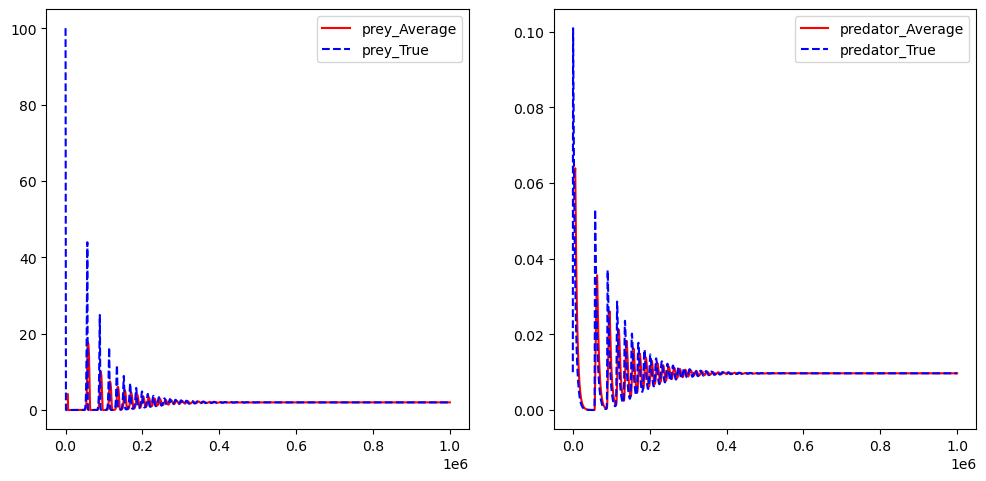

In [6]:
windows = [2000,4000,6000]
for i in windows:
    MovingAverage(df,i)